<a href="https://colab.research.google.com/github/gkdms13572/ai_chatbot/blob/main/%EB%B2%88%ED%98%B8%ED%8C%90_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # YOLOv5 리포지토리 클론
%cd yolov5
!pip install -r requirements.txt  # 필요한 라이브러리 설치

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 79), reused 99 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (11608/11608), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
# 데이터셋 경로 설정
!cp -r /content/drive/MyDrive/dataset

cp: missing destination file operand after '/content/drive/MyDrive/dataset'
Try 'cp --help' for more information.


In [ ]:
data_yaml = """
train: /content/drive/MyDrive/dataset/images/train
val: /content/drive/MyDrive/dataset/images/val/

nc: 3  # 클래스 수
names: ['7character', '8character', '8character_film']  # 클래스 이름
"""

with open('/content/yolov5/data.yaml', 'w') as f:
    f.write(data_yaml)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/data.yaml --weights yolov5s.pt

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
      56/99      4.61G    0.02752   0.009745   0.001837         31        640:  65% 36/55 [00:40<00:18,  1.02it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      56/99      4.61G    0.02754   0.009829    0.00182         37        640:  67% 37/55 [00:42<00:24,  1.37s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      56/99      4.61G    0.02762   0.009867   0.001918         36        640:  69% 38/55 [00:42<00:17,  1.03s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      56/99      4.61G     0.0276   0.009882   0.002

In [ ]:
# 학습된 모델 결과 확인
!ls runs/train/

exp


In [ ]:
# 테스트 평가
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/dataset/images/test/

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 437, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 432, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
 

In [ ]:
!zip -r /content/detection_results.zip /content/yolov5/runs/train/exp


  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/results.png (deflated 7%)
  adding: content/yolov5/runs/train/exp/PR_curve.png (deflated 13%)
  adding: content/yolov5/runs/train/exp/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp/labels.jpg (deflated 30%)
  adding: content/yolov5/runs/train/exp/val_batch2_pred.jpg (deflated 9%)
  adding: content/yolov5/runs/train/exp/R_curve.png (deflated 11%)
  adding: content/yolov5/runs/train/exp/train_batch2.jpg (deflated 4%)
  adding: content/yolov5/runs/train/exp/events.out.tfevents.1725241582.1dd0289a5723.2038.0 (deflated 30%)
  adding: content/yolov5/runs/train/exp/val_batch1_pred.jpg (deflated 8%)
  adding: content/yolov5/runs/train/exp/train_batch1.jpg (deflated 5%)
  adding: content/yolov5/runs/train/exp/confusion_matrix.png (deflated 25%)
  adding: content/yolov5/runs/train/exp/val_batch2_labels.jpg (deflated 9%)
  adding: content/yolov5/runs/train/exp/train_batch0.jpg (deflated 6

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-26 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


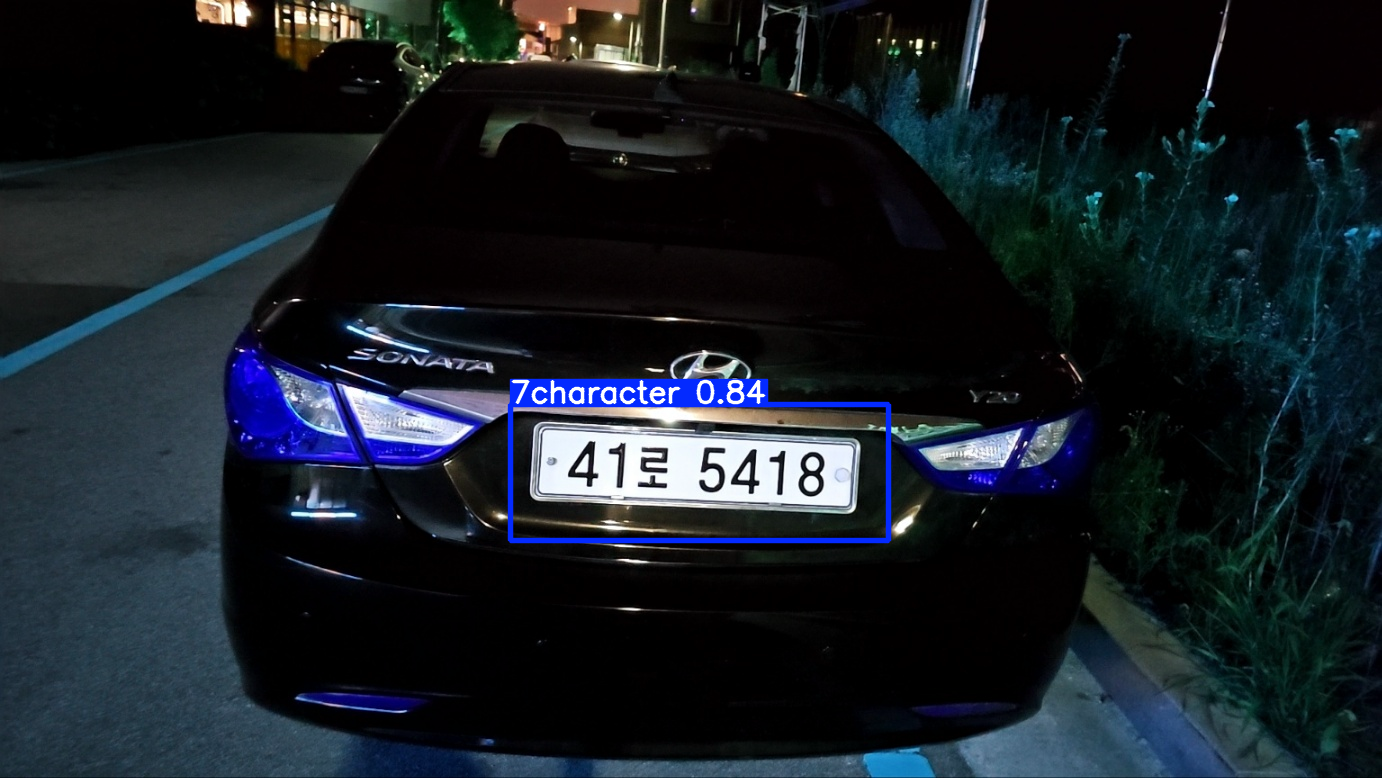

추출된 클래스: [0]


In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt

# 학습된 YOLOv5 모델 로드 (학습된 가중치 경로를 업데이트하세요)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5_results/weights/best.pt', force_reload=True)

# 단일 이미지에 대해 추론을 수행하는 함수 정의
def num_image(image_path):
    # 이미지 로드
    img = cv2.imread(image_path)

    # 추론 수행
    results = model(img)

    # 감지된 객체 정보를 바탕으로 클래스 저장
    extracted_classes = []  # 추출된 클래스 정보를 저장할 리스트

    for *box, conf, cls in results.xyxy[0]:
        extracted_classes.append(int(cls))  # 클래스 정보 저장

    # 결과 표시
    results.show()  # 결과 이미지에 감지된 바운딩 박스를 표시합니다.

    return extracted_classes  # 추출된 클래스 반환

# 이미지 경로를 변수에 저장
image_path = '/(0)1.jpg'

# 함수 테스트 및 클래스 결과 저장
detected_classes = num_image(image_path)

# 클래스 결과 출력
print(f"추출된 클래스: {detected_classes}")


In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,225 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123605 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
# 한글 언어 데이터 설치
!apt-get install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-kor
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,052 kB of archives.
After this operation, 1,693 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-kor all 1:4.00~git30-7274cfa-1.1 [1,052 kB]
Fetched 1,052 kB in 1s (1,050 kB/s)
Selecting previously unselected package tesseract-ocr-kor.
(Reading database ... 123652 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-kor_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-kor (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-kor (1:4.00~git30-7274cfa-1.1) ...


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-26 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


바운딩 박스 좌표: x1=510, y1=404, x2=888, y2=540
추출된 번호판 이미지 크기: (136, 378, 3)


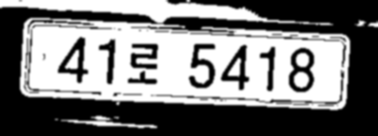

번호판 텍스트를 추출할 수 없습니다.


In [ ]:
import torch
import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Colab 환경에서 OpenCV 이미지를 표시하기 위한 패치

# 학습된 YOLOv5 모델 로드 (학습된 가중치 경로를 업데이트하세요)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5_results/weights/best.pt', force_reload=True)

# 번호판 이미지 전처리 함수
def preprocess_plate(plate_img):
    # 그레이스케일로 변환
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)

    # 이진화 (Thresholding)
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 노이즈 제거 (이미지 블러링)
    processed_img = cv2.GaussianBlur(binary, (5, 5), 0)

    return processed_img

# 번호판 영역 감지 후 전처리 및 글자 추출 함수
def detect_and_extract_license_plate_text(image_path):
    # 이미지 로드
    img = cv2.imread(image_path)

    # 이미지 로드 확인
    if img is None:
        print("이미지를 로드할 수 없습니다. 경로를 확인해주세요.")
        return None  # None 반환

    # YOLOv5로 추론 수행
    results = model(img)

    # 감지된 번호판 영역에서 전처리 및 글자 추출
    extracted_text = ""  # 텍스트를 저장할 변수를 초기화
    for *box, conf, cls in results.xyxy[0]:
        x1, y1, x2, y2 = map(int, box)  # 바운딩 박스 좌표
        print(f"바운딩 박스 좌표: x1={x1}, y1={y1}, x2={x2}, y2={y2}")

        # 번호판 영역 추출
        plate_img = img[y1:y2, x1:x2]

        # 추출된 이미지 크기 확인
        print(f"추출된 번호판 이미지 크기: {plate_img.shape}")

        if plate_img.size == 0:
            print("번호판 이미지가 제대로 추출되지 않았습니다.")
            continue

        # 번호판 이미지 전처리
        processed_plate = preprocess_plate(plate_img)

        # 전처리된 번호판 이미지 Colab에서 표시
        cv2_imshow(processed_plate)

        # Tesseract를 사용하여 번호판 글자 추출 (한글 언어 설정)
        extracted_text = pytesseract.image_to_string(processed_plate, lang='kor')

        # 추출된 글자 출력
        if extracted_text.strip():  # 텍스트가 비어있지 않은 경우
            print(f"추출된 번호판 글자: {extracted_text.strip()}")
            return extracted_text.strip()  # 추출된 텍스트 반환

    return None  # 번호판이 감지되지 않거나 텍스트가 추출되지 않은 경우

# 예제 이미지로 테스트 및 변수에 저장
extracted_license_plate_text = detect_and_extract_license_plate_text(image_path)

# 변수에 저장된 텍스트 출력
if extracted_license_plate_text:
    print(f"저장된 번호판 텍스트: {extracted_license_plate_text}")
else:
    print("번호판 텍스트를 추출할 수 없습니다.")


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


바운딩 박스 좌표: x1=510, y1=404, x2=888, y2=540
추출된 번호판 이미지 크기: (136, 378, 3)


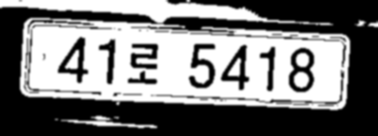

AttributeError: 'NoneType' object has no attribute 'replace'

In [ ]:
# 번호판 텍스트 포맷팅 함수
def format_license_plate_text(extracted_text):
    # 공백 제거 및 텍스트 분리
    cleaned_text = extracted_text.replace(' ', '').strip()

    # 정규 표현식을 사용하여 패턴에 맞는 텍스트 추출
    import re
    # '숫자2글자 + 한글1글자 + 숫자4글자' 패턴 (7character)
    pattern_7char = r'(\d{2})([가-힣])(\d{4})'
    # '숫자3글자 + 한글1글자 + 숫자4글자' 패턴 (8character)
    pattern_8char = r'(\d{3})([가-힣])(\d{4})'

    # 정규 표현식으로 모든 매칭 찾기
    matches_7char = re.findall(pattern_7char, cleaned_text)
    matches_8char = re.findall(pattern_8char, cleaned_text)

    # 매칭된 텍스트가 있을 경우 포맷팅
    if matches_8char:  # 8character 패턴이 우선
        # 첫 번째 매칭된 결과를 사용
        return f"{matches_8char[0][0]}{matches_8char[0][1]}{matches_8char[0][2]}"
    elif matches_7char:  # 7character 패턴
        # 첫 번째 매칭된 결과를 사용
        return f"{matches_7char[0][0]}{matches_7char[0][1]}{matches_7char[0][2]}"

    return None  # 패턴이 맞지 않으면 None 반환

# 번호판 텍스트 추출 테스트
extracted_license_plate_text = detect_and_extract_license_plate_text(image_path)

# 클래스 결과에 따른 텍스트 포맷팅
if detected_classes == [0]:  # 7character
    formatted_text = format_license_plate_text(extracted_license_plate_text)
    if formatted_text:
        print(f"포맷된 번호판 텍스트 (7character): {formatted_text}")
    else:
        print("번호판 텍스트 포맷이 맞지 않습니다.")
elif detected_classes == [1] or detected_classes == [2]:  # 8character
    formatted_text = format_license_plate_text(extracted_license_plate_text)
    if formatted_text:
        print(f"포맷된 번호판 텍스트 (8character): {formatted_text}")
    else:
        print("번호판 텍스트 포맷이 맞지 않습니다.")


In [ ]:
# 장애인 차량 번호 저장
DB = "12루0270"  # 임시 저장된 장애인 차량 번호

# 번호판 텍스트 비교 및 주차 가능 여부 확인
if formatted_text == DB:
  print("주차 가능")
else:
  print("불법 주차")


불법 주차


In [ ]:
import pytesseract
from PIL import Image
from difflib import SequenceMatcher

# Tesseract 경로 설정 (Windows에서는 설치된 경로로 변경)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# 이미지 파일 열기
img = Image.open('image_file_path.jpg')  # 이미지 경로 수정 필요

# Tesseract로 텍스트 추출
extracted_text = pytesseract.image_to_string(img)

# 실제 텍스트
actual_text = "실제 텍스트를 여기에 입력"

# 텍스트 일치율 계산
def calculate_accuracy(extracted, actual):
    return SequenceMatcher(None, extracted, actual).ratio()

accuracy = calculate_accuracy(extracted_text, actual_text)
print(f"Tesseract OCR 정확도: {accuracy * 100:.2f}%")


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pytesseract
from PIL import Image

# 이미지 파일 로드
img = Image.open('/content/drive/MyDrive/num_data/images/val/0 (10).jpg')

# 텍스트 추출
text = pytesseract.image_to_string(img)

# 추출된 텍스트 출력
print(text)


In [ ]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(img, config=custom_config)
print(text)


rT oy 4 . - 1 }
iN 9 f
iN WY, a
i why TA
7 : iy f em “ae = LI) A df
jl 4 << ‘ We MW
al ard ha
ill a a ad i
P wy M,
C ; | Ar

